# Análisis Exploratorio de los datos

En este reporte se llevará a cabo una exploración detallada de los conjuntos de datos asociados con los conjuntos de hechos y víctimas. La meta principal consiste en comprender la organización de estos datos, detectar posibles patrones y recopilar información significativa que pueda servir como guía para realizar el dashboard en PowerBI.

Importacón de librerias

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
import geopandas as gpd
from shapely.geometry import Point
# Desactivar los warnings
warnings.filterwarnings("ignore")

## Carga de los datos

In [53]:
homicidios_hechos = pd.read_csv('../Data/homicidios_hechos.csv')
homicidios_victimas = pd.read_csv('../Data/homicidios_victimas.csv')

lesiones_hechos = pd.read_csv('../Data/lesiones_hechos.csv')
lesiones_victimas = pd.read_csv('../Data/lesiones_victimas.csv')

### Concatenación de los datos

Se relaiza la concatenacion de los csv `homicidios_hechos` y `lesiones_hechos`, asi como también de los csv `homicidios_victimas` y `lesiones_victimas`

#### Dataframes de hechos

In [54]:
# Define el nuevo orden de las columnas para 'homicidios_hechos'
nuevo_orden_homicidios_hechos = ['id_hecho', 'n_victimas', 'fecha', 'hh', 'tipo_calle', 'comuna',
                                'longitud', 'latitud', 'victima', 'acusado','gravedad']

# Reordena las columnas en 'homicidios_hechos' según el nuevo orden
homicidios_hechos = homicidios_hechos[nuevo_orden_homicidios_hechos]

# Define el nuevo orden de las columnas para 'lesiones_hechos'
nuevo_orden_lesiones_hechos = ['id_hecho', 'n_victimas', 'fecha', 'hh', 'comuna', 'tipo_calle',
                               'longitud', 'latitud', 'victima', 'acusado', 'gravedad']

# Reordena las columnas en 'lesiones_hechos' según el nuevo orden
lesiones_hechos = lesiones_hechos[nuevo_orden_lesiones_hechos]

# Concatena los DataFrames
hechos = pd.concat([homicidios_hechos, lesiones_hechos], ignore_index=True)

Se modifica de la columna `tipo_calle` **GRAL PAZ** por **AVENIDA** como indica el diccionario de datos

In [55]:
hechos['tipo_calle'] = hechos['tipo_calle'].replace('GRAL PAZ', 'AVENIDA')

#### Se modifica el contenido de algunas columnas para el Dashboard

In [236]:
hechos['Victima_fatal'] = hechos['Victima_fatal'].replace({'SI': 1})
hechos['Victima_fatal'] = hechos['Victima_fatal'].replace({'NO': 0})

#Se crea una nueva columna para victimas no fatales
hechos['Victima_no_fatal'] = 1 - hechos['Victima_fatal']

In [240]:
hechos.sample(10)

,id_hecho,n_victimas,fecha,hh,tipo_calle,comuna,longitud,latitud,victima,acusado,gravedad,Victima_fatal,Victima_no_fatal
11809,LC-2020-0034641,1,2020-01-16,21.0,AVENIDA,4.0,-58.426747,-34.658672,MOTO,AUTO,LEVE,0,1
21047,LC-2021-0379922,1,2021-07-31,21.0,NaN,NaN,NaN,NaN,NaN,NaN,LEVE,0,1
10161,LC-2019-0752064,1,2019-11-28,19.0,NaN,1.0,-58.371855,-34.597620,BICICLETA,NaN,LEVE,0,1
4048,LC-2019-0263922,1,2019-04-27,17.0,NaN,14.0,-58.423534,-34.576795,NaN,NaN,LEVE,0,1
23634,LC-2021-0589334,2,2021-11-26,4.0,CALLE,1.0,-58.366597,-34.616878,AUTO,OTRO,LEVE,0,1
7220,LC-2019-0490031,1,2019-08-07,17.0,NaN,7.0,-58.436773,-34.649448,NaN,NaN,LEVE,0,1
20777,LC-2021-0337155,2,2021-07-17,17.0,AVENIDA,7.0,-58.426936,-34.632608,CAMIONETA,AUTO,GRAVE,0,1
5090,LC-2019-0334163,1,2019-05-28,23.0,NaN,11.0,-58.494972,-34.609356,NaN,NaN,LEVE,0,1
15724,LC-2020-0608564,1,2020-11-12,20.0,CALLE,4.0,-58.417647,-34.643036,MOTO,NaN,LEVE,0,1
22416,LC-2021-0488976,1,2021-10-01,13.0,CALLE,12.0,-58.487904,-34.574984,PEATON,AUTO,LEVE,0,1


#### DataFrame de victimas

In [56]:
# Define el nuevo orden de las columnas para 'homicidios_victimas'
nuevo_orden_homicidios_victimas = ['id_hecho', 'fecha', 'rol', 'vehiculo_victima', 'sexo_victima',
                                   'edad_victima', 'gravedad']

# Reordena las columnas en 'homicidios_victimas' según el nuevo orden
homicidios_victimas = homicidios_victimas[nuevo_orden_homicidios_victimas]

# Define el nuevo orden de las columnas para 'lesiones_victimas'
nuevo_orden_lesiones_victimas = ['id_hecho', 'fecha', 'vehiculo_victima', 'sexo_victima', 'edad_victima',
                                 'gravedad']

# Reordena las columnas en 'lesiones_victimas' según el nuevo orden
lesiones_victimas = lesiones_victimas[nuevo_orden_lesiones_victimas]

# Concatena los DataFrames
victimas = pd.concat([homicidios_victimas, lesiones_victimas], ignore_index=True)

Realizar la modificación en el tipo de datos del data frame `victimas`

In [57]:
# Diccionario de conversión
conversiones_victimas = {'id_hecho': str,'rol': 'category','vehiculo_victima': 'category','sexo_victima': 'category','gravedad': 'category'}

# Aplicar las conversiones 
victimas = victimas.astype(conversiones_victimas)

In [ ]:
hechos['Victima_fatal'] = hechos['Victima_fatal'].replace({'SI': 1})
hechos['Victima_fatal'] = hechos['Victima_fatal'].replace({'NO': 0})

#Se crea una nueva columna para victimas no fatales
hechos['Victima_no_fatal'] = 1 - hechos['Victima_fatal']

In [247]:
victimas['Victima_fatal'] = (victimas['gravedad'] == 'FATAL').astype(int)
victimas['Victima_no_fatal'] = 1 - victimas['Victima_fatal']

In [248]:
victimas.to_csv('../Data/victimas.csv')

##### Guardado de los datos

In [110]:
# Guardar el DataFrame 'hechos' en un archivo CSV
hechos.to_csv('../Data/hechos.csv', index=False)

# Guardar el DataFrame 'victimas' en un archivo CSV
victimas.to_csv('../Data/victimas.csv', index=False)

### Estructura de los dataframe

### Primeras filas del dataframe `hechos`

In [58]:
hechos.head()

,id_hecho,n_victimas,fecha,hh,tipo_calle,comuna,longitud,latitud,victima,acusado,gravedad
0,2016-0001,1,2016-01-01,4.0,AVENIDA,8.0,-58.475340,-34.687570,MOTO,AUTO,FATAL
1,2016-0002,1,2016-01-02,1.0,AVENIDA,9.0,-58.508775,-34.669777,AUTO,PASAJEROS,FATAL
2,2016-0003,1,2016-01-03,7.0,AVENIDA,1.0,-58.390403,-34.631894,MOTO,AUTO,FATAL
3,2016-0004,1,2016-01-10,0.0,AVENIDA,8.0,-58.465039,-34.680930,MOTO,NaN,FATAL
4,2016-0005,1,2016-01-21,5.0,AVENIDA,1.0,-58.387183,-34.622466,MOTO,PASAJEROS,FATAL


#### Tipo de datos

In [60]:
hechos.dtypes

id_hecho       object
n_victimas      int64
fecha          object
hh            float64
tipo_calle     object
comuna        float64
longitud      float64
latitud       float64
victima        object
acusado        object
gravedad       object
dtype: object

#### Valores nulos

In [62]:
hechos.isnull().sum()

id_hecho          0
n_victimas        0
fecha             0
hh               10
tipo_calle    11045
comuna         1459
longitud       1483
latitud        1483
victima       10742
acusado       15311
gravedad          0
dtype: int64

Las columnas `tipo_calle`, `victima`, `acusado` contienen una cantidad significativa de valores nulos. No obstante, al extraer únicamente en los eventos catalogados con gravedad fatal, se evidenció una reducción considerable en la proporción de valores nulos en estas columnas.

In [64]:
hechos.loc[hechos['gravedad'] == 'FATAL'].isnull().sum()

id_hecho       0
n_victimas     0
fecha          0
hh             1
tipo_calle     2
comuna         4
longitud      14
latitud       14
victima        9
acusado       23
gravedad       0
dtype: int64

#### Cantidad de filas y columnas

In [66]:
hechos.shape

(24481, 11)

#### Filas duplicadas

In [67]:
hechos.duplicated().sum()

0

#### Estadística descriptiva

In [77]:
hechos.drop(columns=['comuna','longitud','latitud']).describe()

,n_victimas,hh
count,24481.000000,24471.000000
mean,1.156856,13.555556
std,0.544944,5.596032
min,0.000000,0.000000
25%,1.000000,10.000000
50%,1.000000,14.000000
75%,1.000000,18.000000
max,16.000000,23.000000


Para la columna `n_victimas`, se observan un total de 24,481 registros válidos. La cantidad promedio de víctimas por accidente es de aproximadamente 1.16, con una desviación estándar de 0.54, indicando una variabilidad moderada alrededor de la media. La cantidad de víctimas varía desde un mínimo de 0 hasta un máximo de 16, con un 75% de los accidentes reportando una sola víctima.

En cuanto a la columna `hh`, se dispone de 24,471 registros. La hora promedio en la que ocurren los accidentes es aproximadamente a las 13:00 . La desviación estándar de 5.60 sugiere cierta variabilidad en las horas de los accidentes. El rango de horas abarca desde las 0:00 hasta las 23:00, con el 25% de los accidentes ocurriendo antes de las 10:00 y el 75% antes de las 18:00.

In [79]:
hechos[hechos['gravedad'] == 'FATAL'].drop(columns=['comuna', 'longitud', 'latitud']).describe()

,n_victimas,hh
count,699.000000,698.000000
mean,1.032904,11.651862
std,0.193901,6.692723
min,1.000000,0.000000
25%,1.000000,6.000000
50%,1.000000,11.000000
75%,1.000000,17.000000
max,3.000000,23.000000


Para los accidentes catalogados como fatales en el dataframe 'hechos', se dispone de 699 registros válidos. En promedio, estos accidentes involucran aproximadamente 1.03 víctimas, con una desviación estándar de 0.19, indicando una variabilidad baja en la cantidad de víctimas por incidente.

En relación con la hora de los accidentes fatales, la media es aproximadamente a las 11:00 . La desviación estándar de 6.69 sugiere cierta variabilidad en las horas de estos eventos. El rango de horas abarca desde las 0:00 hasta las 23:00, con el 25% de los accidentes fatales ocurriendo antes de las 6:00 y el 75% antes de las 17:00.

In [80]:
victimas.describe()

,edad_victima
count,23798.000000
mean,37.851122
std,15.379793
min,0.000000
25%,27.000000
50%,35.000000
75%,46.000000
max,100.000000


### Primeras filas del dataframe `victimas`

In [81]:
victimas.head()

,id_hecho,fecha,rol,vehiculo_victima,sexo_victima,edad_victima,gravedad
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19.0,FATAL
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70.0,FATAL
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30.0,FATAL
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18.0,FATAL
4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29.0,FATAL


#### Tipo de datos

In [82]:
victimas.isnull().sum()

id_hecho                0
fecha                   0
rol                 27616
vehiculo_victima    16281
sexo_victima         2234
edad_victima         4524
gravedad                0
dtype: int64

Las columnas `rol`, `vehiculo_victima` y `edad_victima`  contienen una cantidad significativa de valores nulos. No obstante, al extraer únicamente en los eventos catalogados con gravedad fatal, se evidenció una reducción considerable en la proporción de valores nulos en estas columnas.

In [83]:
victimas.loc[victimas['gravedad'] == 'FATAL'].isnull().sum()

id_hecho             0
fecha                0
rol                 11
vehiculo_victima     9
sexo_victima         6
edad_victima        53
gravedad             0
dtype: int64

#### Cantidad de filas y columnas

In [84]:
victimas.shape

(28322, 7)

#### Filas duplicadas

In [85]:
victimas.duplicated().sum()

631

Al contar duplicados se ve que hay 631 filas duplicadas. Para estar seguro de que realmente son o no duplicados, voy a tomar el `id` y analizar la situación

In [87]:
victimas[victimas.duplicated()].head()

,id_hecho,fecha,rol,vehiculo_victima,sexo_victima,edad_victima,gravedad
795,LC-2019-0006638,2019-01-04,NaN,NaN,MASCULINO,37.0,LEVE
812,LC-2019-0008238,2019-01-04,NaN,NaN,FEMENINO,69.0,LEVE
818,LC-2019-0008388,2019-01-04,NaN,NaN,FEMENINO,NaN,LEVE
833,LC-2019-0008860,2019-01-05,NaN,NaN,MASCULINO,67.0,LEVE
858,LC-2019-0010436,2019-01-06,NaN,NaN,MASCULINO,12.0,LEVE


In [94]:
filas = victimas[victimas['id_hecho'] == 'LC-2019-0006638']
filas

,id_hecho,fecha,rol,vehiculo_victima,sexo_victima,edad_victima,gravedad
794,LC-2019-0006638,2019-01-04,NaN,NaN,MASCULINO,37.0,LEVE
795,LC-2019-0006638,2019-01-04,NaN,NaN,MASCULINO,37.0,LEVE


In [92]:
hechos[hechos['id_hecho'] == 'LC-2019-0006638']

,id_hecho,n_victimas,fecha,hh,tipo_calle,comuna,longitud,latitud,victima,acusado,gravedad
759,LC-2019-0006638,2,2019-01-04,9.0,NaN,10.0,-58.496239,-34.636075,MOTO,NaN,LEVE


La suma de la columna `n_victimas` en el dataframe `hechos` da como resultado solo una fila con respecto al número total de filas en el dataframe `victimas`. Esto significa que no son datos duplicados, sino más bien ante la representación de individuos distintos que comparten similitudes en edad y sexo, y que estuvieron involucrados en el mismo accidente.

#### Estadística descriptiva

In [96]:
victimas.describe()

,edad_victima
count,23798.000000
mean,37.851122
std,15.379793
min,0.000000
25%,27.000000
50%,35.000000
75%,46.000000
max,100.000000


La columna `edad_victima` en el dataframe `victimas` cuenta con 23,798 registros válidos. La edad promedio de las víctimas en accidentes es de aproximadamente 38 años, con una desviación estándar de 15, indicando una variabilidad moderada alrededor de la media.

En términos de distribución, la edad mínima registrada es de 0 años. El primer cuartil (25%) muestra que el 25% de las víctimas tienen 27 años o menos, mientras que el segundo cuartil (50%) indica que la mitad de las víctimas tienen 35 años o menos. El tercer cuartil (75%) revela que el 75% de las víctimas tienen 46 años o menos. La edad máxima registrada es de 100 años.

In [98]:
victimas[victimas['gravedad']=='FATAL'].describe()

,edad_victima
count,664.000000
mean,42.167169
std,19.788034
min,1.000000
25%,27.000000
50%,37.000000
75%,56.250000
max,95.000000


Las edades de víctimas fatales tuvieron un total de 664 registros. La edad promedio de estas víctimas es de aproximadamente 42 años, con una desviación estándar de alrededor de 20 años, lo que indica cierta variabilidad en las edades.

La edad más joven registrada es de 1 año, mientras que el 25% de las víctimas tienen 27 años o menos. La mediana, que representa el punto medio de las edades, es de 37 años, lo que significa que el 50% de las víctimas tienen esta edad o menos. El 75% de las edades son 56 años o menos, y la edad máxima registrada es de 95 años.

### Histogramas

Visualizar la distribución de las edades de las víctimas, dividiendo la representación en dos filas distintas. En la primera fila, presentamos la distribución de edades considerando todos los datos disponibles. En la segunda fila, nos enfocamos exclusivamente en los accidentes fatales.

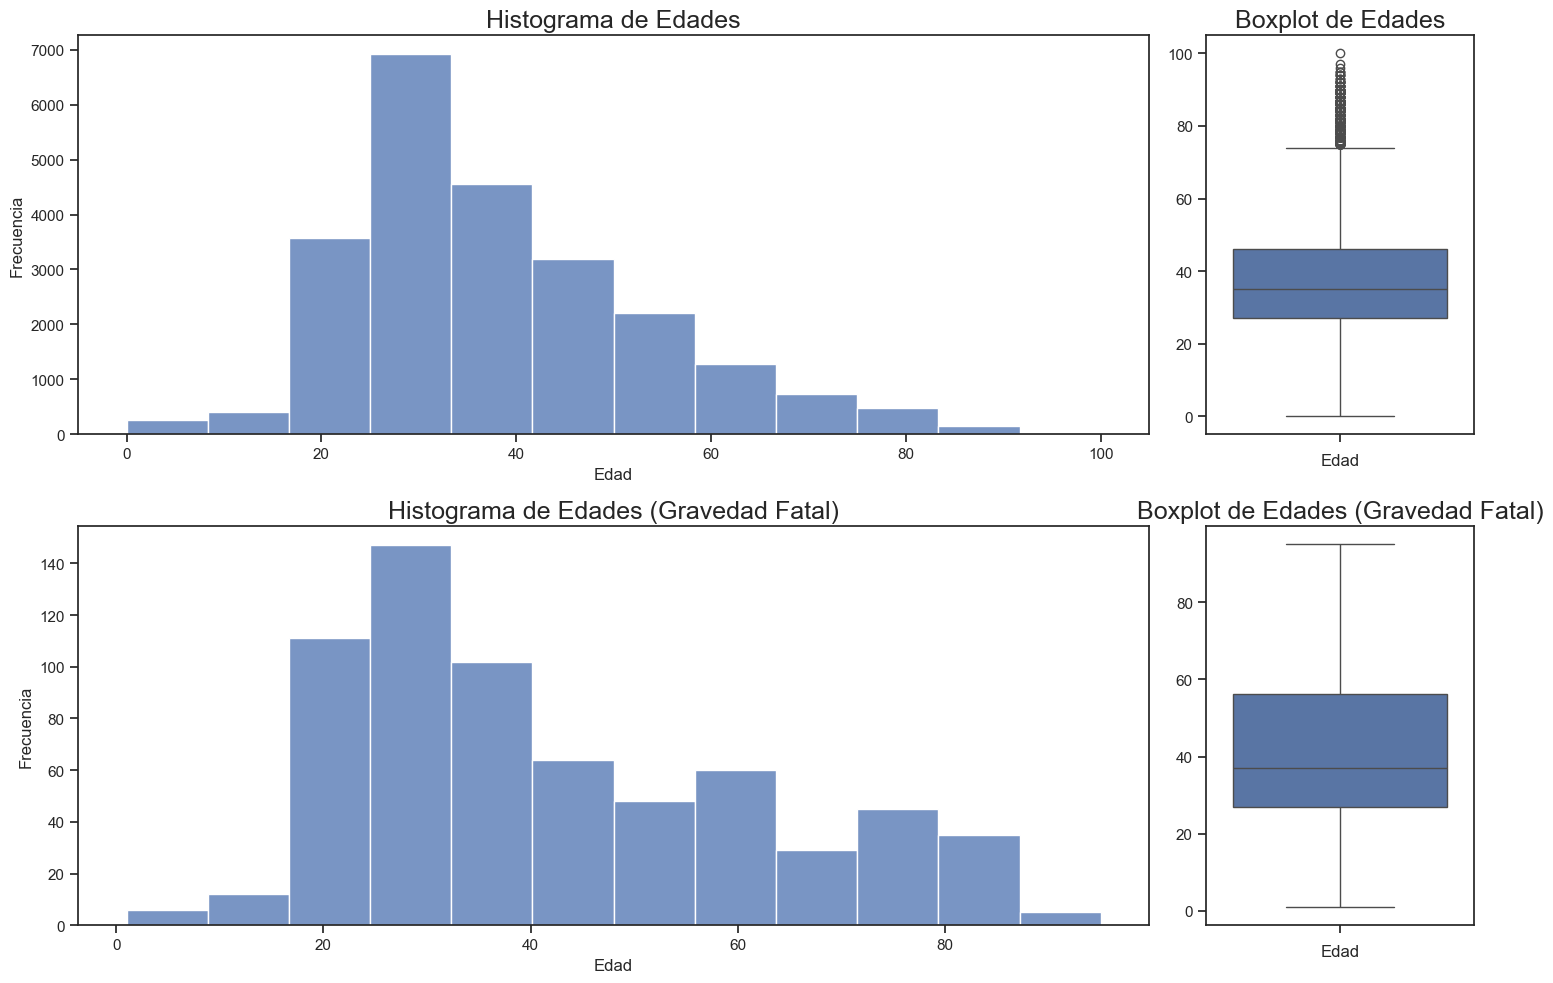

In [100]:

# Crear subconjuntos de datos
todos_los_datos = victimas
gravedad_fatal = victimas[victimas['gravedad'] == 'FATAL']

# Configurar estilo
sns.set(style="ticks")


# Crear subgráficos 2x2 con anchos relativos
fig, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'width_ratios': [8, 2]})

# Histograma de todas las edades
sns.histplot(data=todos_los_datos, x='edad_victima', ax=axs[0, 0],bins= 12)
axs[0, 0].set_title('Histograma de Edades',fontsize=18)
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')

# Boxplot de todas las edades (vertical)
sns.boxplot(data=todos_los_datos, y='edad_victima', ax=axs[0, 1])
axs[0, 1].set_title('Boxplot de Edades',fontsize=18)
axs[0, 1].set_xlabel('Edad')
axs[0, 1].set_ylabel('')

# Histograma de edades con gravedad fatal
sns.histplot(data=gravedad_fatal, x='edad_victima', ax=axs[1, 0],bins= 12)
axs[1, 0].set_title('Histograma de Edades (Gravedad Fatal)',fontsize=18)
axs[1, 0].set_xlabel('Edad')
axs[1, 0].set_ylabel('Frecuencia')

# Boxplot de edades con gravedad fatal (vertical)
sns.boxplot(data=gravedad_fatal, y='edad_victima', ax=axs[1, 1])
axs[1, 1].set_title('Boxplot de Edades (Gravedad Fatal)',fontsize=18)
axs[1, 1].set_xlabel('Edad')
axs[1, 1].set_ylabel('')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


Al analizar los histogramas de edades en accidentes fatales y no fatales, noté una notable similitud en sus distribuciones. Sin embargo, al examinar el boxplot que abarca todos los datos, identifiqué la presencia de valores extremos, los cuales no están presentes en los accidentes de gravedad fatal. Las medianas en ambos casos son parecidas, indicando una tendencia central similar. No obstante, destaco que el rango intercuartílico de los accidentes fatales es más amplio en comparación con los no fatales, sugiriendo una mayor variabilidad en las edades de las víctimas en situaciones de gravedad fatal.

Además, es importante señalar que la cantidad de datos relacionados con accidentes no fatales es significativamente mayor que la cantidad de accidentes fatales.

#### Gráfico de Barras

##### Gráfico de Barras de Tipo de Calle
Frecuencia en la que ocurren los accidentes dependiendo del tipo de calle.

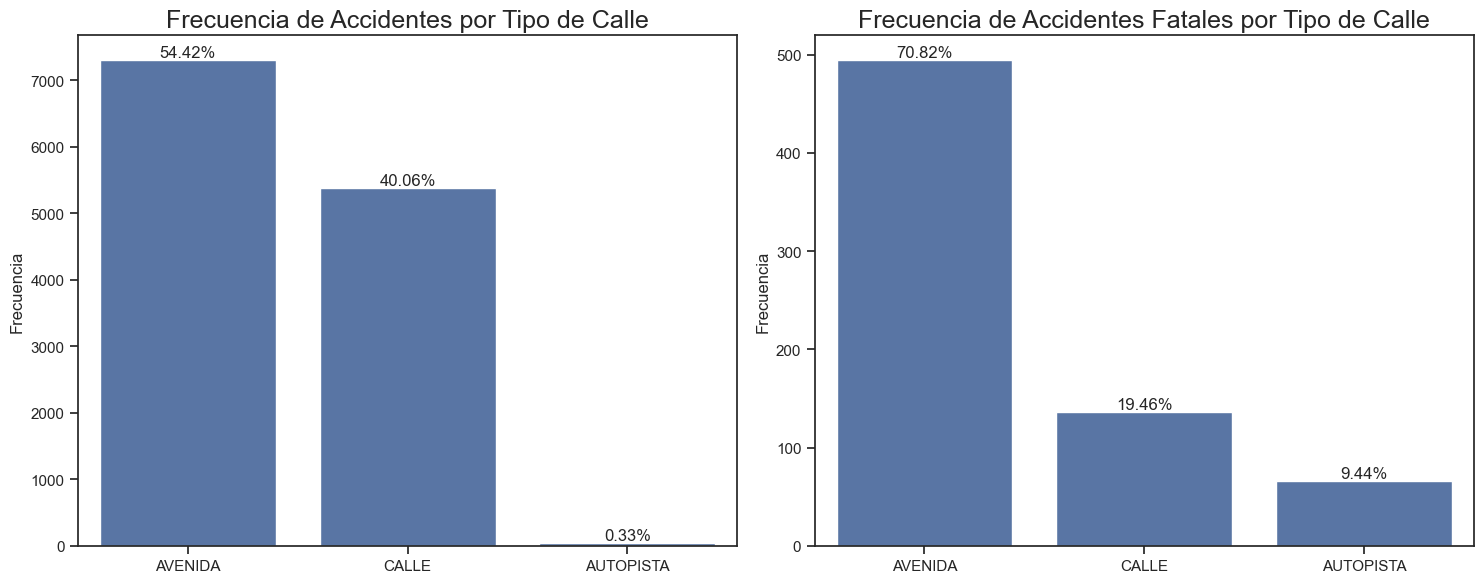

In [103]:
# Configurar estilo
sns.set(style="ticks")

# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras para los accidentes no fatal, ordenado de mayor a menor
sns.countplot(x='tipo_calle', data=hechos[hechos['gravedad'] != 'FATAL'], order=hechos['tipo_calle'].value_counts().index, ax=axs[0])
axs[0].set_title('Frecuencia de Accidentes por Tipo de Calle', fontsize=18)
axs[0].set_xlabel('')
axs[0].set_ylabel('Frecuencia')

# Agregar etiquetas de porcentaje en cada barra en el primer gráfico
total_todos = len(hechos[hechos['gravedad'] != 'fatal'].dropna(subset=['tipo_calle']))
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_todos:.2%}', ha="center", va="bottom", fontsize=12)  # Aumentar el tamaño de la fuente

# Gráfico de barras filtrando por gravedad fatal y ordenado de mayor a menor
sns.countplot(x='tipo_calle', data=hechos[hechos['gravedad'] == 'FATAL'], order=hechos['tipo_calle'].value_counts().index, ax=axs[1])

# Agregar etiquetas de porcentaje en cada barra en el segundo gráfico
total_fatal = len(hechos[hechos['gravedad'] == 'FATAL'])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_fatal:.2%}', ha="center", va="bottom", fontsize=12)  # Aumentar el tamaño de la fuente

axs[1].set_title('Frecuencia de Accidentes Fatales por Tipo de Calle', fontsize=18)
axs[1].set_xlabel('')
axs[1].set_ylabel('Frecuencia')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

La mayoría de accidentes, tanto fatales como no fatales, ocurre mayormente en avenidas, seguido por calles y autopistas en menor medida. En los accidentes fatales, las avenidas destacan significativamente, representando el 70% de los casos. En contraste, en los accidentes no fatales, las avenidas aún mantienen la mayoría, con aproximadamente el 53.18%, seguidas por calles con un 54.42% y autopistas con un 0.33%.

#### Gráfico de barras de roles en accidentes fatales

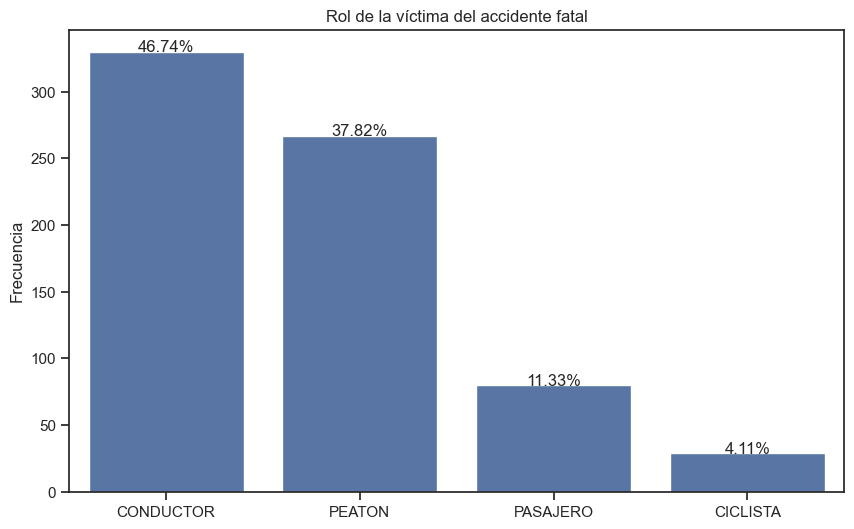

In [105]:
# Configurar estilo
sns.set(style="ticks")

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='rol', data=victimas[victimas['gravedad'] == 'FATAL'].dropna(subset=['rol']), order=victimas[victimas['gravedad'] == 'FATAL']['rol'].value_counts().index)

# Agregar etiquetas de porcentaje en cada barra
total_fatal = len(victimas[victimas['gravedad'] == 'FATAL'].dropna(subset=['rol']))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total_fatal:.2%}', ha="center")

plt.title('Rol de la víctima del accidente fatal')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

Al analizar el rol que desempeñaba la persona víctima del accidente fatal, se ve que en el 46.74% de los casos era el conductor, en el 37.82% era el peatón, en el 11.33% era el pasajero y en el 4.11% de los casos era el ciclista.

#### Gráfico de Barras de accidentes por comuna

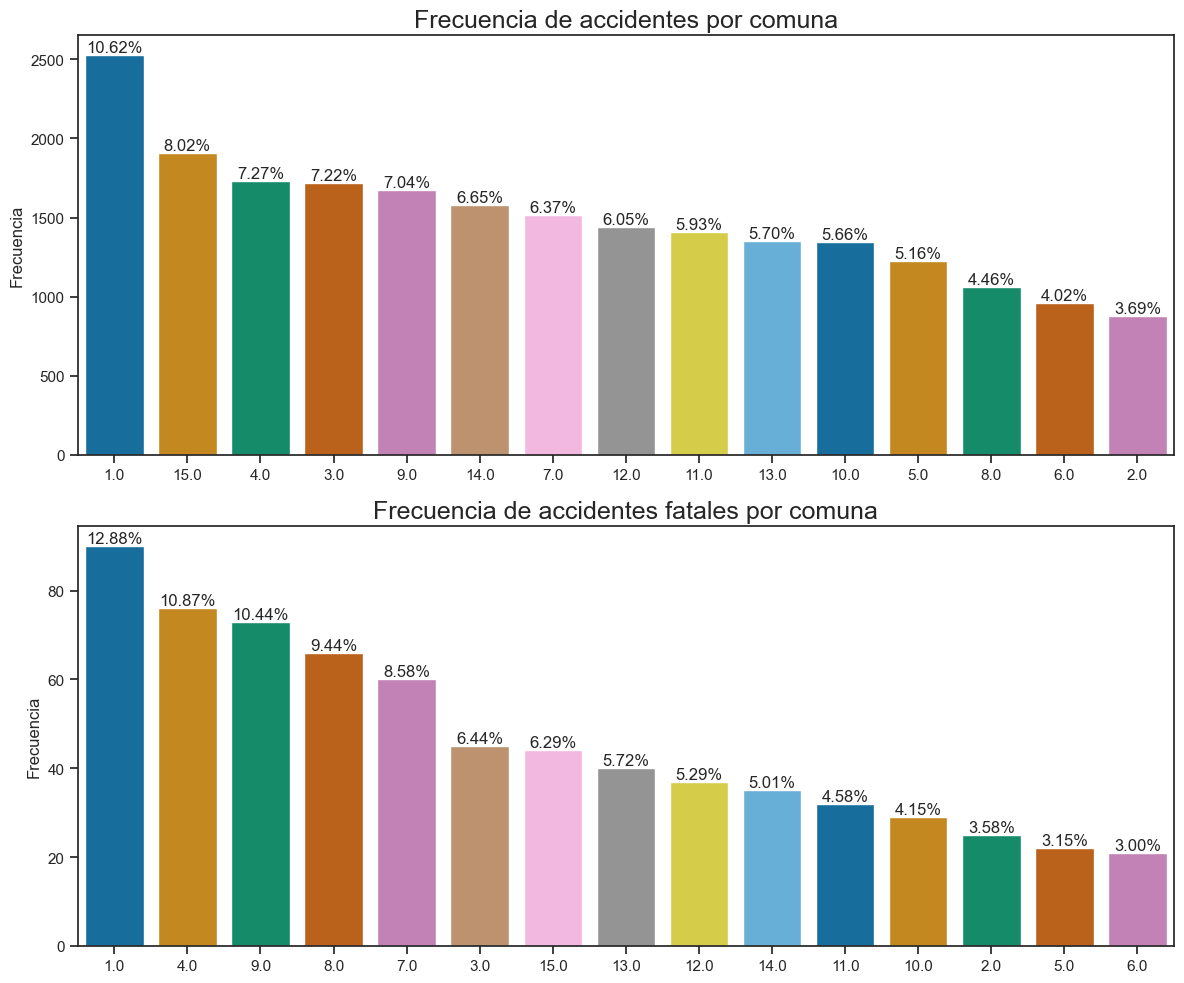

In [107]:
# Configurar estilo
sns.set(style="ticks")

# Crear subgráficos
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# Gráfico de barras para gravedad distinta de "fatal"
sns.countplot(x='comuna', data=hechos[hechos['gravedad'] != 'FATAL'], order=hechos['comuna'].value_counts().index, ax=axs[0] ,palette='colorblind')
axs[0].set_title('Frecuencia de accidentes por comuna',fontsize=18)
axs[0].set_xlabel('') 
axs[0].set_ylabel('Frecuencia')

# Agregar etiquetas de porcentaje en cada barra en el primer gráfico
total_todos = len(hechos[hechos['gravedad'] != 'FATAL'])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_todos:.2%}', ha="center", va="bottom", fontsize=12) 

# Gráfico de barras para gravedad "fatal"
sns.countplot(x='comuna', data=hechos[hechos['gravedad'] == 'FATAL'], order=hechos[hechos['gravedad'] == 'FATAL']['comuna'].value_counts().index, ax=axs[1], palette='colorblind') 
axs[1].set_title('Frecuencia de accidentes fatales por comuna',fontsize=18)
axs[1].set_xlabel('')
axs[1].set_ylabel('Frecuencia')

# Agregar etiquetas de porcentaje en cada barra en el segundo gráfico
total_fatal = len(hechos[hechos['gravedad'] == 'FATAL'])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_fatal:.2%}', ha="center", va="bottom", fontsize=12) 

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()



En el gráfico de barras superior, que ilustra los accidentes no fatales por comuna, se evidencia que la mayoría de estos incidentes se concentran especialmente en las comunas 1, 15 y 4. Por otro lado, en la representación inferior, correspondiente a los accidentes fatales, se observa que las comunas más afectadas son la 1, 4 y 9

#### Gráfica de barras por vehículo de la víctima

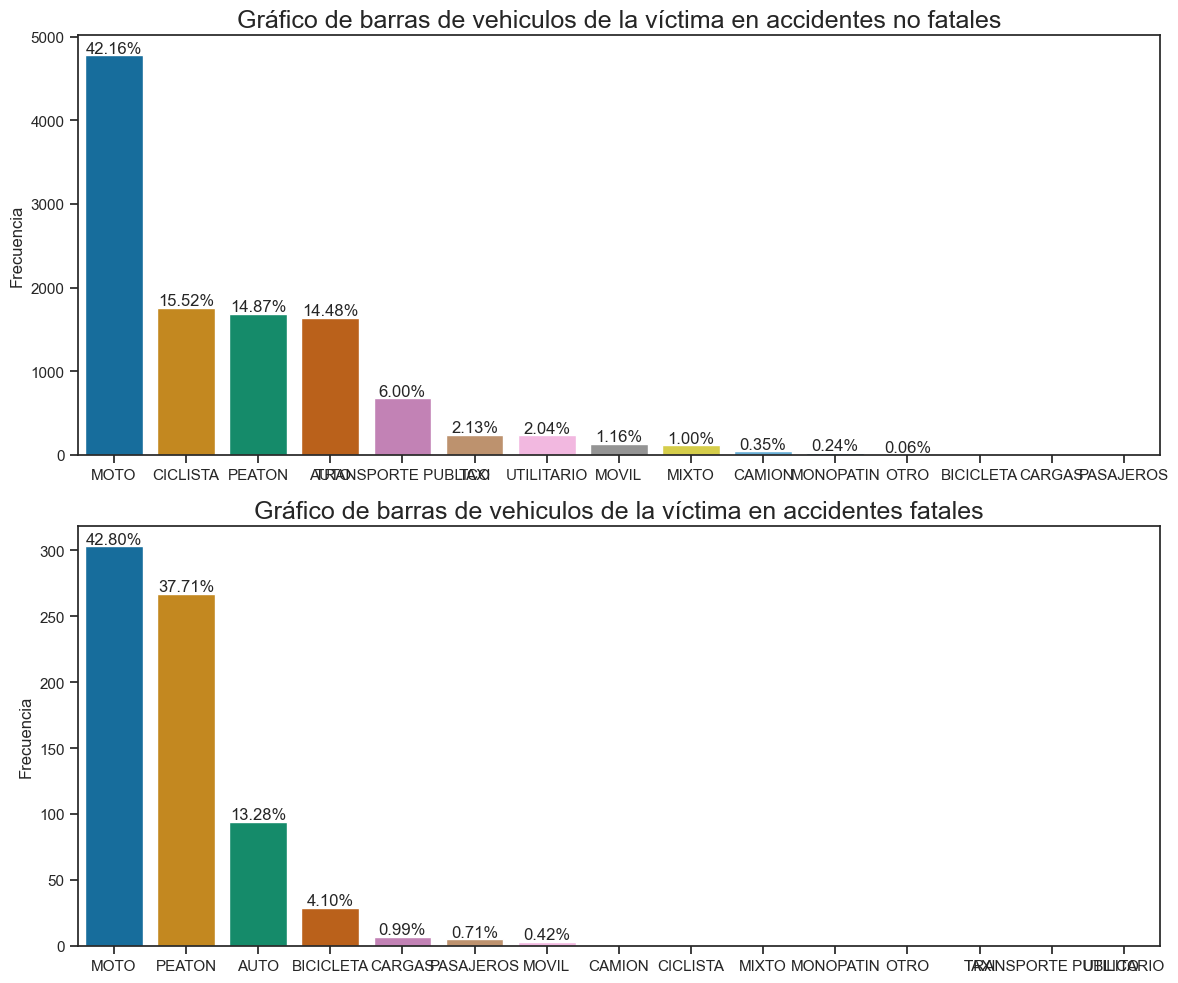

In [249]:
# Configurar estilo
sns.set(style="ticks")

# Crear dos subgráficos (2 filas, 1 columna)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Subgráfico 1: Gravedades diferentes de 'fatal'
order_no_fatal = victimas[victimas['gravedad'] != 'FATAL']['vehiculo_victima'].value_counts().index
ax1 = sns.countplot(x='vehiculo_victima', data=victimas[victimas['gravedad'] != 'FATAL'], ax=axes[0], order=order_no_fatal,palette='colorblind')
axes[0].set_title('Gráfico de barras de vehiculos de la víctima en accidentes no fatales',fontsize=18)
axes[0].set_xlabel('')
axes[0].set_ylabel('Frecuencia')

# Añadir etiquetas de porcentaje al Subgráfico 1
total_no_fatal = len(victimas[victimas['gravedad'] != 'FATAL'].dropna(subset=['vehiculo_victima']))
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height / total_no_fatal:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')  # Ajuste aquí

# Subgráfico 2: Gravedad 'fatal'
order_fatal = victimas[victimas['gravedad'] == 'FATAL']['vehiculo_victima'].value_counts().index
ax2 = sns.countplot(x='vehiculo_victima', data=victimas[victimas['gravedad'] == 'FATAL'], ax=axes[1], order=order_fatal,palette='colorblind')
axes[1].set_title('Gráfico de barras de vehiculos de la víctima en accidentes fatales',fontsize=18)
axes[1].set_xlabel('')
axes[1].set_ylabel('Frecuencia')

# Añadir etiquetas de porcentaje al Subgráfico 2
total_fatal = len(victimas[victimas['gravedad'] == 'FATAL'].dropna(subset=['vehiculo_victima']))
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height / total_fatal:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')  # Ajuste aquí

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

En el 42.16% de los casos de accidentes no fatales, el vehículo en el que se encontraba la víctima resultó ser una motocicleta, seguida por la bicicleta con un 15.52%, el peatón con un 14.87%, y el auto con un 14.48%.

En cuanto a los accidentes fatales, la motocicleta lidera con un 42.8%, seguida por el peatón con un 37.71%, y el automóvil con un 13.28%.

#### Gráfico de barras de los vehículos involucrados

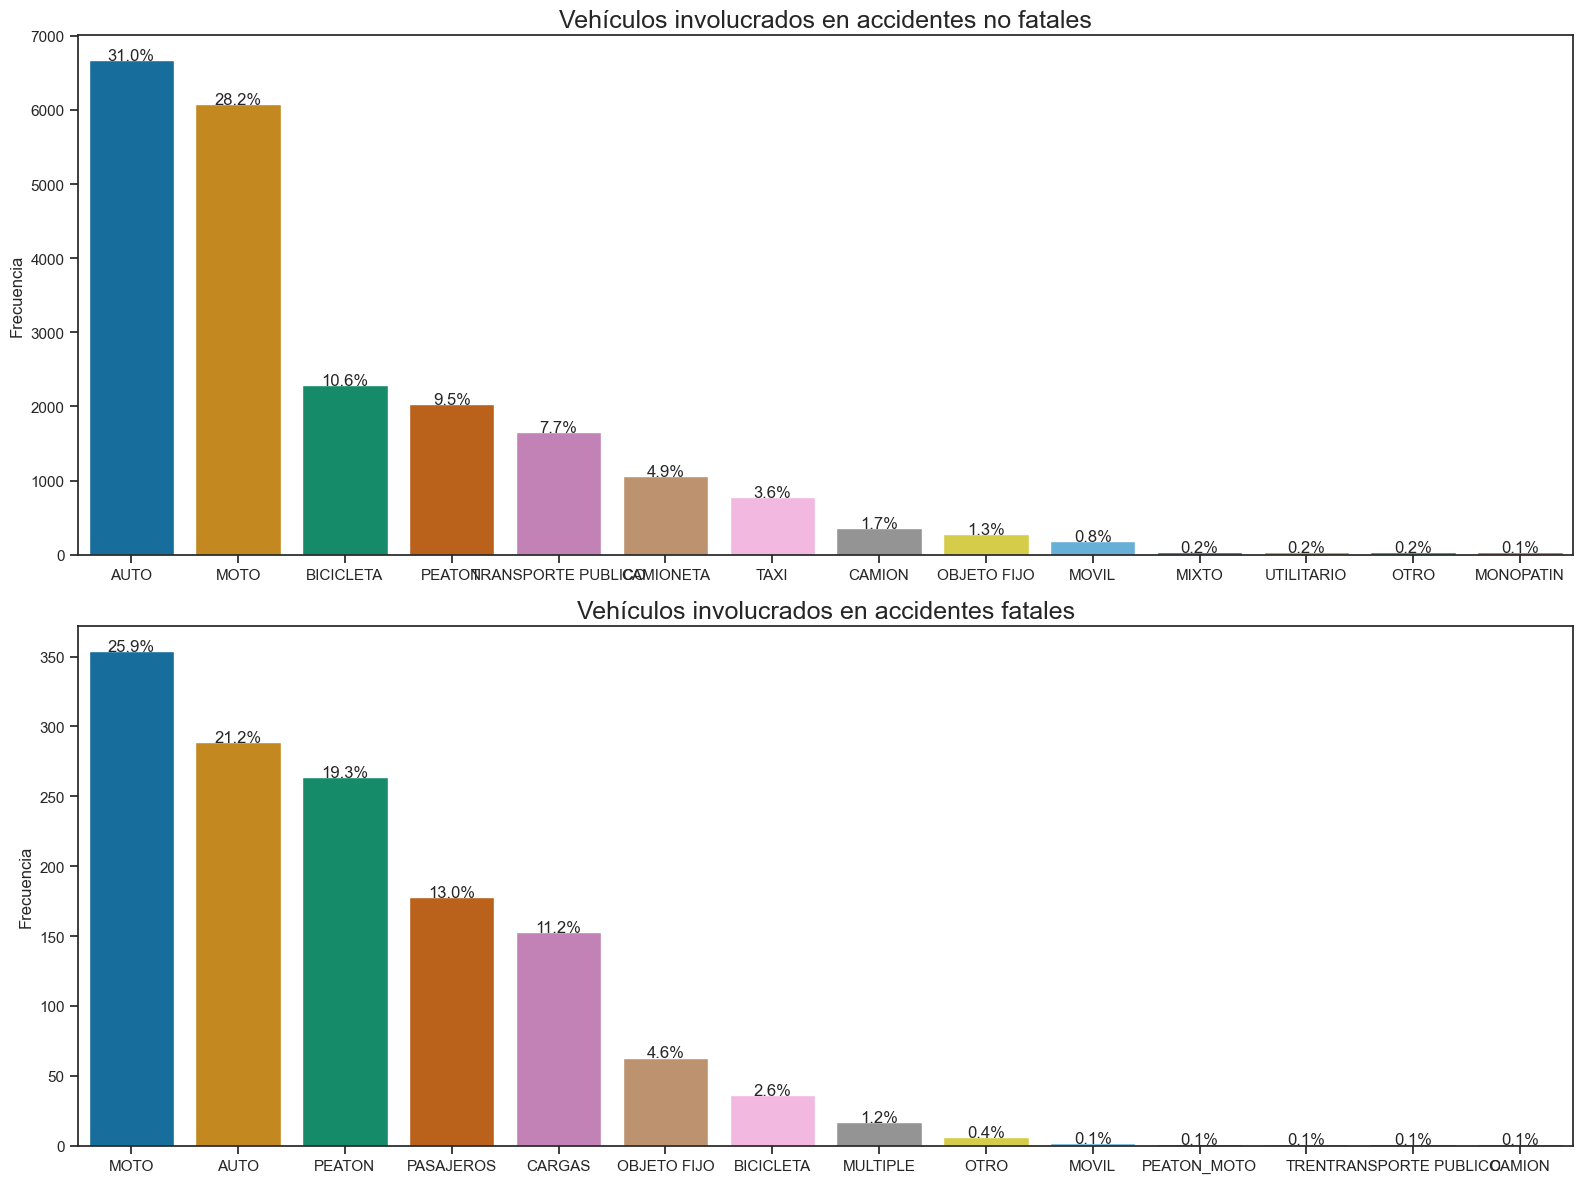

In [252]:
# Filtrar gravedades distintas de 'fatal' y 'fatal'
gravedad_no_fatal = hechos[hechos['gravedad'] != 'FATAL']
gravedad_fatal = hechos[hechos['gravedad'] == 'FATAL']

# Combina las dos columnas en una sola serie y elimina los valores nulos
vehiculos_no_fatal = pd.concat([gravedad_no_fatal['victima'], gravedad_no_fatal['acusado']]).dropna()
vehiculos_fatal = pd.concat([gravedad_fatal['victima'], gravedad_fatal['acusado']]).dropna()

# Configuración del estilo de Seaborn 
sns.set(style="ticks")

# Crear subgráficos 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))

# Subgráfico 1: Gravedades distintas de 'FATAL'
order_no_fatal = vehiculos_no_fatal.value_counts().index
sns.countplot(x=vehiculos_no_fatal, ax=axes[0], order=order_no_fatal,palette='colorblind')
axes[0].set_title('Vehículos involucrados en accidentes no fatales',fontsize=18)
axes[0].set_xlabel('')
axes[0].set_ylabel('Frecuencia')

# Agregar etiquetas de porcentaje en cada barra (Subgráfico 1)
total_no_fatal = len(vehiculos_no_fatal.dropna())
for p in axes[0].patches:
    percentage = '{:.1f}%'.format((p.get_height() / total_no_fatal) * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.1  # Ajuste para subir la etiqueta
    axes[0].annotate(percentage, (x, y), ha='center')

# Subgráfico 2: Gravedad 'FATAL'
order_fatal = vehiculos_fatal.value_counts().index
sns.countplot(x=vehiculos_fatal, ax=axes[1], order=order_fatal,palette='colorblind')
axes[1].set_title('Vehículos involucrados en accidentes fatales',fontsize=18)
axes[1].set_xlabel('')
axes[1].set_ylabel('Frecuencia')

# Agregar etiquetas de porcentaje en cada barra (Subgráfico 2)
total_fatal = len(vehiculos_fatal)
for p in axes[1].patches:
    percentage = '{:.1f}%'.format((p.get_height() / total_fatal) * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.1  # Ajuste para subir la etiqueta
    axes[1].annotate(percentage, (x, y), ha='center')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

En accidentes no fatales, se observa que el vehículo más comúnmente involucrado es el auto, representando el 31% de los casos. Las motocicletas también son frecuentes, contribuyendo con un 28.2%, seguidas por los ciclistas con un 10.65%. Por otro lado, en accidentes fatales, las motocicletas están presentes en el 25.6% de los casos, seguidas por los autos con un 21.2%. Los peatones también están significativamente involucrados en accidentes fatales, representando un 19.2% de los casos. 